In [ ]:
#1

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Leer la imagen
image = cv2.imread('images/waffle.png')
cv2.imshow('original', image)
# Hacer una copia de la imagen
image_copy = np.copy(image)

# Cambiar al RGB
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

cv2.imshow('RGB',image_copy)

# Convertir a escala de crises
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# Detectar esquinas 
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilatar la imagen de las esquinas para mejorar los puntos de las esquinas
dst = cv2.dilate(dst,None)

cv2.imshow('imagen dilatada',dst)
# Este valor varía según la imagen y la cantidad de esquinas que desee detectar.
# Intente cambiar este parámetro libremente, 0.1, para que sea más grande o más pequeño y vea qué sucede
thresh = 0.1*dst.max()

# Crea una copia de la imagen para dibujar esquinas
corner_image = np.copy(image_copy)

# Iterar por todas las esquinas y dibujarlas en la imagen (si pasan el umbral)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (0,255,0), 1)

cv2.imshow('esquinas',corner_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
#2

In [5]:
import cv2
import numpy as np

img = cv2.imread('images/waffle.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)
 
height, width = dst.shape
color = (0, 255, 0)

for y in range(0, height):
    for x in range(0, width):
        if dst.item(y, x) > 0.01 * dst.max():
            cv2.circle(img, (x, y), 3, color, cv2.FILLED, cv2.LINE_AA)

cv2.imshow('Harris Result', dst)
cv2.imshow('Harris Corner', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#3

In [10]:
import numpy as np
import cv2 as cv
filename = 'images/board.png'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result se usa para marcar esquinas, no es importante
dst = cv.dilate(dst,None)
 # Umbral del mejor valor, puede variar de una imagen a otra.
img[dst>0.01*dst.max()]=[0,0,255]
cv.imshow('dst',img)
#if cv.waitKey(0) & 0xff == 27:
#    cv.destroyAllWindows()
cv.waitKey(0)
cv.destroyAllWindows()    

In [ ]:
#4

In [14]:
import numpy as np
import cv2

img = cv2.imread('images/board.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#algoritmo de shitomashi
corners = cv2.goodFeaturesToTrack(gray, 1000, 0.01, 10)
corners = np.int0(corners)
   
for i in corners:
    x,y = i.ravel()
    cv2.circle(img, (x,y), 3, 255, -1)
   
cv2.imshow('corner', img)
cv2.waitKey(0)
cv2.destroyAllWindows()   

In [ ]:
#5

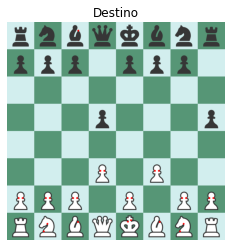

In [15]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
 
img = cv2.imread('images/board.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray, 25, 0.05, 10)
 
# El resultado devuelto es una matriz de [[311., 250.]] dos niveles de paréntesis.
corners = np.int0(corners)
 
for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x, y), 3, 255, -1)
 
plt.imshow(img), plt.title('Destino'), plt.axis('off')
plt.show()

In [ ]:
#6

In [2]:
# -*- coding: utf-8 -*-
'''
Introducción a SIFT (Transformación de características invariables de escala)
 El algoritmo SIFT implica principalmente cuatro pasos:
 1. Detección extrema de espacio de escala (detección de extremo de espacio de escala)
 2. Localización de puntos clave.
 3. Asignación de dirección
 4. Descriptor de punto clave
 5. Coincidencia de puntos clave
 La siguiente demostración es la función SIFT en OpenCV: cv2.SIFT ()
'''
 
import cv2
 
img = cv2.imread('images/lena.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
'''
 Cuando se usa OpenCV con Python para SIFT, la compilación tiene estos problemas:
AttributeError: module 'cv2' has no attribute 'SIFT'
 El código de error es el siguiente:
sift = cv2.SIFT()
 Motivo: opencv ha integrado SIFT y otros algoritmos en la colección xfeatures2d. La redacción modificada es la siguiente:
sift=cv2.xfeatures2d.SIFT_create()
'''
#sift = cv2.SIFT()
sift = cv2.xfeatures2d.SIFT_create()
 
 #La función # sift.detect () es encontrar puntos clave en la imagen. Si solo desea reducir parte de la imagen, puede pasar la máscara
 # Cada punto clave es una estructura especial con muchos atributos. Como coordenadas (x, y), tamaño de campo significativo, especificar el ángulo de su dirección, especificar la respuesta de la intensidad de los puntos clave, etc.
kp = sift.detect(gray, None)
 
 # drawKeypoints: la primera imagen de entrada del parámetro, el segundo punto clave del parámetro, la tercera imagen de salida del parámetro
 # cv2.drawKeypoints () se usa para dibujar círculos pequeños en la posición de los puntos clave. Si le pasa una bandera cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
 # Se dibujará un círculo con un tamaño como punto clave, e incluso se mostrará su dirección.
# img = cv2.drawKeypoints(gray, kp, img)
img = cv2.drawKeypoints(gray, kp, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG)
cv2.imwrite('sift_keypoints.jpg', img)
 
'''
 Ahora para calcular el descriptor, OpenCV proporciona dos métodos:
 1. Ahora que se ha encontrado el punto clave, puede usar sift.compute () para calcular el descriptor del punto clave, por ejemplo: kp, des = sift.compute (gris, kp)
 2. Si no se encuentra el punto clave, puede usar la función sift.detectAndCompute () para buscar directamente el punto clave y el descriptor en un solo paso: de la siguiente manera:
'''
 # El kp que se encuentra aquí será una lista de puntos clave, y des es una matriz numpy de forma Number_of_Keypoints * 128
kp, des = sift.detectAndCompute(gray, None)
 
cv2.imshow('sift_keypoints', img)
cv2.waitKey(0) & 0xFF
cv2.destroyAllWindows()

error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\opencv_contrib-4.0.1\modules\xfeatures2d\src\sift.cpp:1207: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SIFT::create'


In [ ]:
#7

In [18]:
#importing the cv2 module
import cv2
#reading the image whose key points are to be detected using imread() function
imageread = cv2.imread('images/plane.jpg')
cv2.imshow('plane', imageread)
#converting the given image to grayscale image
imagegray = cv2.cvtColor(imageread, cv2.COLOR_BGR2GRAY)
#implementing SIFT algorithm to detect key points in the image
siftfeatures = cv2.xfeatures2d.SIFT_create()
keypoints = siftfeatures.detect(imagegray, None)
#drawing the key points on the input image using drawKeypoints() function
resultimage = cv2.drawKeypoints(imagegray, keypoints, 0, (0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)
#displaying the image with keypoints as the output on the screen
cv2.imshow('image_with_keypoints', resultimage)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\opencv_contrib-4.0.1\modules\xfeatures2d\src\sift.cpp:1207: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SIFT::create'


In [ ]:
#8

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('images/board.png',0)
# Inicializar el objeto FAST con valores predeterminados
fast = cv.FastFeatureDetector_create()
 # Encuentra y dibuja puntos clave
kp = fast.detect(img,None)
img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
 # Imprime todos los parámetros predeterminados
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
cv.imwrite('fast_true.png',img2)
 # Desactivar la supresión no máxima
fast.setNonmaxSuppression(0)
kp = fast.detect(img,None)
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
cv.imwrite('fast_false.png',img3)

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 1145
Total Keypoints without nonmaxSuppression: 7084


True

In [ ]:
#9

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('images/lena.jpg')
# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()

# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv2.drawKeypoints(img, kp, None, color=(255,0,0))

# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )

cv2.imshow('fast_true',img2)

# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img,None)

print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )

img3 = cv2.drawKeypoints(img, kp, None, color=(255,0,0))

cv2.imshow('fast_false',img3)

cv2.waitKey()
cv2.destroyAllWindows()

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 3537
Total Keypoints without nonmaxSuppression: 11951
